# Using Weighted average for each movie's Average Rating
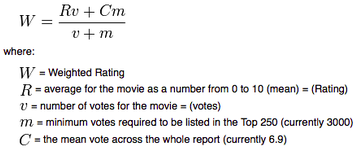

Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.set_option('display.max_columns', None)

In [2]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
movies_path="tmdb-dataset/tmdb_5000_movies.csv"
credits_path="tmdb-dataset/tmdb_5000_credits.csv"

In [3]:
movies=pd.read_csv(movies_path)
print(movies.shape)
display(movies.head())

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits=pd.read_csv(credits_path)
print(credits.shape)
display(credits.head())

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Merge

In [5]:
movies=movies.rename(columns={'id':'movie_id'})

In [6]:
movies_credits=movies.merge(credits,on='movie_id')
print(movies_credits.shape)
display(movies_credits.head(2))

(4803, 23)


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [7]:
print(len(movies_credits))
display(movies_credits.isnull().sum())

4803


budget                     0
genres                     0
homepage                3091
movie_id                   0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [8]:
movies_credits.drop(['homepage','production_countries','status','title_x','title_y','crew'],axis=1,inplace=True)

In [9]:
display(movies_credits.head(2))

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."


# EDA

In [10]:
movies_credits['original_title'].unique().shape

(4801,)

<AxesSubplot:>

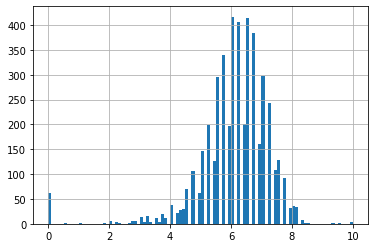

In [11]:
movies_credits['vote_average'].hist(bins=100)

<AxesSubplot:>

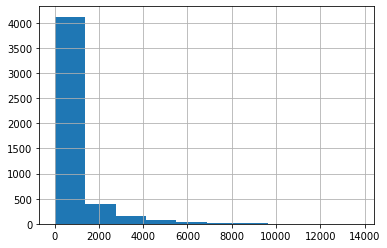

In [12]:
movies_credits['vote_count'].hist()

<AxesSubplot:>

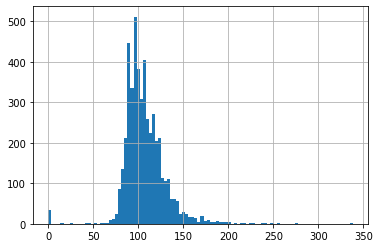

In [13]:
movies_credits['runtime'].hist(bins=100)

<AxesSubplot:>

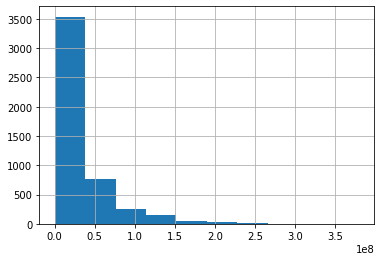

In [14]:
movies_credits['budget'].hist()

In [15]:
movies_credits['original_language'].value_counts().head(10)

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
Name: original_language, dtype: int64

In [16]:
#### Calculate required parameter for weighted average

In [17]:
R=movies_credits['vote_average']
v=movies_credits['vote_count']
C=movies_credits['vote_average'].mean()
m=movies_credits['vote_count'].quantile(0.70)

In [18]:
weighted_avg=(R*v+C*m)/(v+m)

In [19]:
weighted_avg

0       7.148013
1       6.807627
2       6.276075
3       7.509565
4       6.098319
          ...   
4798    6.239746
4799    6.090532
4800    6.101451
4801    6.087503
4802    6.097742
Length: 4803, dtype: float64

In [20]:
movies_credits['weighted_avg']=weighted_avg

In [21]:
movies_credits_sorted=movies_credits.sort_values('weighted_avg',ascending=False)
display(movies_credits_sorted.head(2))

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,weighted_avg
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...",8.340775
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...",8.192887


In [22]:
movies_credits_sorted[['movie_id','original_title','vote_average','vote_count','weighted_avg']]

,movie_id,original_title,vote_average,vote_count,weighted_avg
1881,278,The Shawshank Redemption,8.5,8205,8.340775
3337,238,The Godfather,8.4,5893,8.192887
662,550,Fight Club,8.3,9413,8.171648
3232,680,Pulp Fiction,8.3,8428,8.157615
65,155,The Dark Knight,8.2,12002,8.102674
...,...,...,...,...,...
303,314,Catwoman,4.2,808,4.991470
3746,241251,The Boy Next Door,4.1,1022,4.822053
210,415,Batman & Robin,4.2,1418,4.749951
242,166424,Fantastic Four,4.4,2278,4.743880


## Recommendation Based on Weighted avg

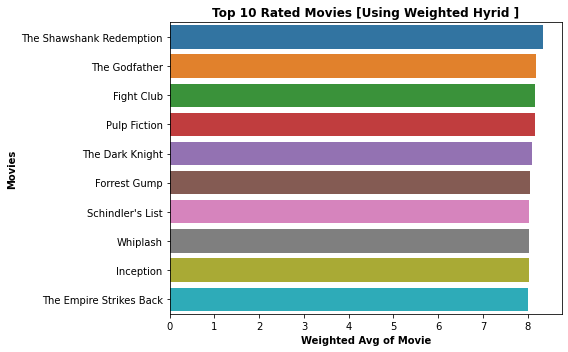

In [23]:
top=10

graph_title_1="Top {} Rated Movies [Using Weighted Hyrid ]".format(top)

plt.figure(figsize=(8,5))
sns.barplot(x=movies_credits_sorted['weighted_avg'].head(top),y=movies_credits_sorted['original_title'].head(top))
plt.title(graph_title_1,weight='bold')
plt.xlabel("Weighted Avg of Movie",weight='bold')
plt.ylabel("Movies",weight='bold')
plt.tight_layout()

plt.savefig(graph_title_1+'.jpg')
plt.show()

## Recommendation Based on Popularity avg

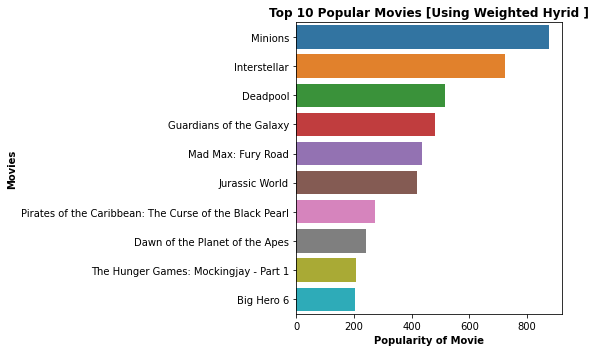

In [24]:
movies_credits_sorted=movies_credits.sort_values('popularity',ascending=False)
graph_title_2="Top {} Popular Movies [Using Weighted Hyrid ]".format(top)

plt.figure(figsize=(8,5))
sns.barplot(x=movies_credits_sorted['popularity'].head(top),y=movies_credits_sorted['original_title'].head(top))
plt.title(graph_title_2,weight='bold')
plt.xlabel("Popularity of Movie",weight='bold')
plt.ylabel("Movies",weight='bold')
plt.tight_layout()

plt.savefig(graph_title_2+'.jpg')
plt.show()

## Recommendation Based on Weighted avg with popularity (50% priority given to both)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
transformed=scale.fit_transform(movies_credits[['weighted_avg','popularity']])
transformed

array([[0.6743388 , 0.17181451],
       [0.5814027 , 0.15884603],
       [0.43627257, 0.12263486],
       ...,
       [0.38859469, 0.00164973],
       [0.38478644, 0.00097879],
       [0.38758191, 0.00220412]])

In [26]:
movies_credits[['weighted_avg_norm','popularity_norm']]=transformed

In [27]:
display(movies_credits[['weighted_avg_norm','popularity_norm']].head())

,weighted_avg_norm,popularity_norm
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [28]:
score=movies_credits['weighted_avg_norm']*0.5+movies_credits['popularity_norm']*0.5
movies_credits['score']=score
movies_credits_sorted=movies_credits.sort_values('score',ascending=False)

In [29]:
display(movies_credits_sorted[['movie_id','original_title','vote_average','vote_count','weighted_avg','popularity','score']].head())

,movie_id,original_title,vote_average,vote_count,weighted_avg,popularity,score
95,157336,Interstellar,8.1,10867,7.998100,724.247784,0.866801
546,211672,Minions,6.4,4571,6.365286,875.581305,0.730315
94,118340,Guardians of the Galaxy,7.9,9742,7.798252,481.098624,0.700668
788,293660,Deadpool,7.4,10995,7.334360,514.569956,0.656453
127,76341,Mad Max: Fury Road,7.2,9427,7.135687,434.278564,0.583481


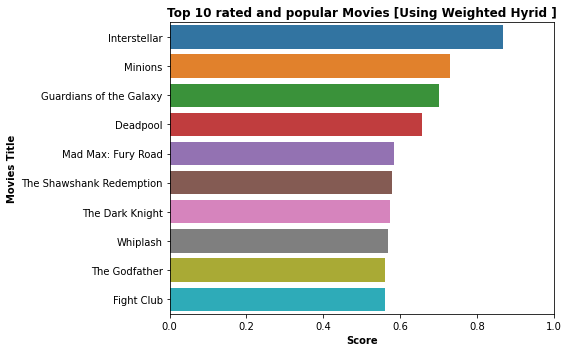

In [30]:
graph_title_3="Top {} rated and popular Movies [Using Weighted Hyrid ]".format(top)

plt.figure(figsize=(8,5))
sns.barplot(x=movies_credits_sorted['score'].head(top),y=movies_credits_sorted['original_title'].head(top))
plt.title(graph_title_3,weight='bold')
plt.xlim(0,1)
plt.xlabel("Score",weight='bold')
plt.ylabel("Movies Title",weight='bold')
plt.tight_layout()

plt.savefig(graph_title_3+'.jpg')
plt.show()